WITH OVERSAMPLING

In [82]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, cohen_kappa_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Read the datasets from the CSV files
x_train = pd.read_csv("data_split/X_resampled_train.csv").drop(columns=['Encoded_City'])
y_train = pd.read_csv('data_split/y_resampled_train.csv').iloc[:, 0]

x_valid = pd.read_csv('data_split/X_val.csv').drop(columns=['Encoded_City'])
y_valid = pd.read_csv('data_split/y_val.csv').iloc[:, 0]


x_test = pd.read_csv('data_split/X_test.csv').drop(columns=['Encoded_City'])
y_test = pd.read_csv('data_split/y_test.csv').iloc[:, 0]

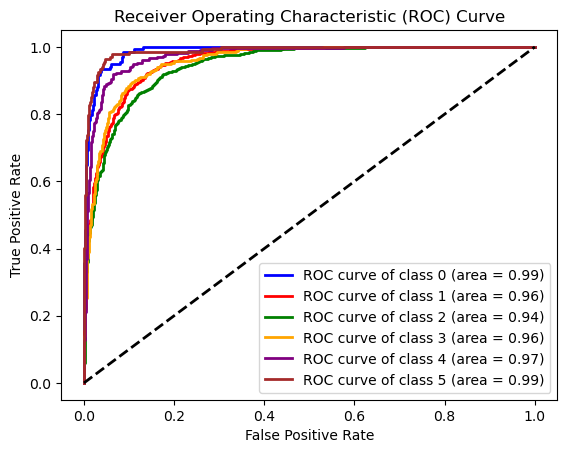

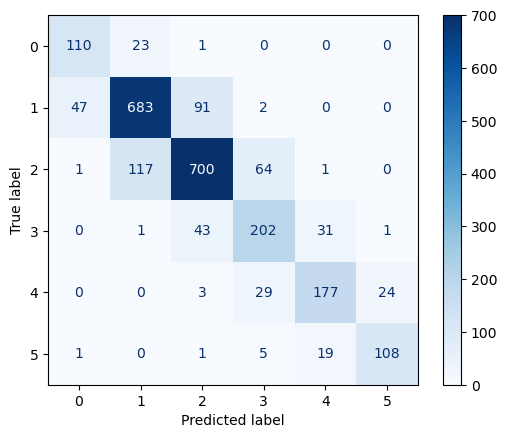

Training Accuracy: 0.9774175279626222
Validation Accuracy: 0.7967806841046278
Precision: 0.7996887393956413
Recall: 0.7967806841046278
F1 Score: 0.7976062105994172
Cohen's Kappa Score: 0.7260005834025469
Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.82      0.75       134
         1.0       0.83      0.83      0.83       823
         2.0       0.83      0.79      0.81       883
         3.0       0.67      0.73      0.70       278
         4.0       0.78      0.76      0.77       233
         5.0       0.81      0.81      0.81       134

    accuracy                           0.80      2485
   macro avg       0.77      0.79      0.78      2485
weighted avg       0.80      0.80      0.80      2485

Test Accuracy: 0.806841046277666


In [103]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import joblib


# Train the XGBClassifier model
model = xgb.XGBClassifier(objective="softmax", num_class=6,n_estimators=4000, eta=0.01,subsample=0.5, colsample_bytree=0.5)  # Adjust the number of classes accordingly
model.fit(x_train, y_train)

# Make predictions on the training and validation sets
y_train_pred = model.predict(x_train)
y_valid_pred = model.predict(x_valid)

# Calculate evaluation metrics for the training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)

precision = precision_score(y_valid, y_valid_pred, average='weighted')
recall = recall_score(y_valid, y_valid_pred, average='weighted')
f1 = f1_score(y_valid, y_valid_pred, average='weighted')
kappa = cohen_kappa_score(y_valid, y_valid_pred)
classification_rep = classification_report(y_valid, y_valid_pred)

# Plot ROC curve
y_valid_pred_proba = model.predict_proba(x_valid)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(model.n_classes_):
    fpr[i], tpr[i], _ = roc_curve(y_valid, y_valid_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown'] 
for i, color in zip(range(model.n_classes_), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Create and display confusion matrix
cm = confusion_matrix(y_valid, y_valid_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Print evaluation metrics
print(f'Training Accuracy: {train_accuracy}')
print(f'Validation Accuracy: {valid_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Cohen\'s Kappa Score: {kappa}')
print(f'Classification Report:\n{classification_rep}')

# Save the model
joblib.dump(model, 'xgb_model.joblib')

# Test the accuracy on the test set
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

